<a href="https://colab.research.google.com/github/SachinScaler/UnsupervisedML_Feb24/blob/main/ML_Intro_to_Unsupervised_Learning%2C_KMeans_Revisited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2024-02-20 15:45:21--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 173.194.213.138, 173.194.213.113, 173.194.213.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.213.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download [following]
--2024-02-20 15:45:21--  https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.193.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139827 (137K) [application/octet-stream]
Saving to: ‘E-commerce.csv’

E-commerce.csv      100%[===================>] 136.55K  --.

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('./E-commerce.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [25]:
df.shape

(2500, 7)

### LLOYD's Algo: Scratch Implementation

Let's create an aritificial dataset

In [26]:
data_size = 1000
num_iters = 5
num_clusters = 4

from sklearn.datasets import make_blobs

# 2-Dim Data
data, y = make_blobs(n_samples=2000, centers=4, n_features=2,random_state=0)

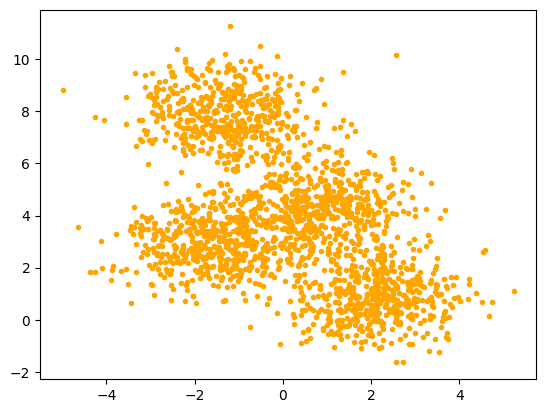

In [27]:
# plot the datapoints
plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'orange', label = 'data points')


In [28]:
import matplotlib.pyplot as plt

# function to plot data as cluster and centroids
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                color = 'red', label = 'centroid')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

In [30]:
import numpy as np
# Initialise centroids

n_clusters = 4
centroids = data[np.random.choice(range(data.shape[0]), size = (n_clusters, ))]

# Create a list to store which centroid is assigned to each dataset
assigned_centroids = np.zeros(len(data), dtype = np.int32)

def compute_l2_distance(x, centroids):
    dist = np.array([]).reshape(len(x),0)
    for centroid in (centroids):
      # Compute the difference, following by raising to power 2 and summing
      new_dist = np.sqrt(((x - centroid) ** 2).sum(axis = 1)).reshape(-1,1)
      dist = np.hstack([dist,new_dist])
    return dist


# find the closest centroid
def get_closest_centroid(x, centroids):

    # Loop over each centroid and compute the distance from data point.
    dist = compute_l2_distance(x, centroids)

    # Get the index of the centroid with the smallest distance to the data point
    closest_centroid_index =  np.argmin(dist, axis = 1)

    return closest_centroid_index


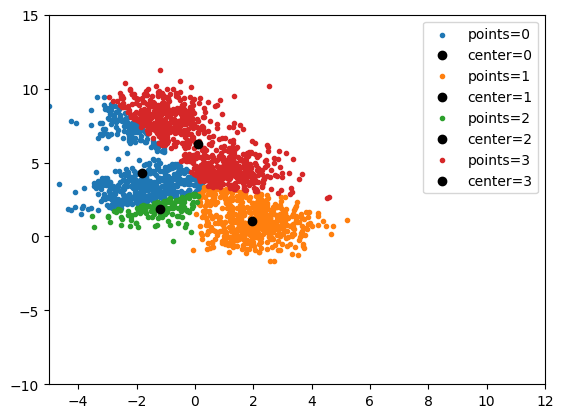

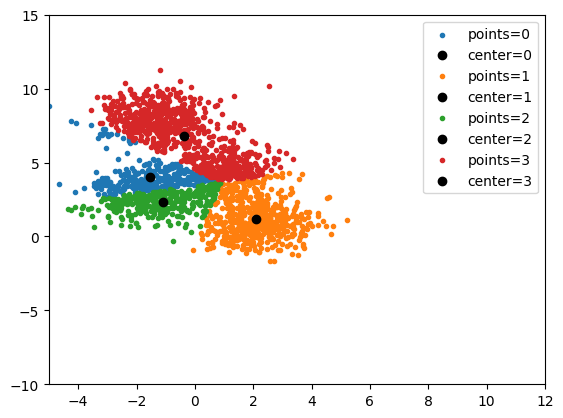

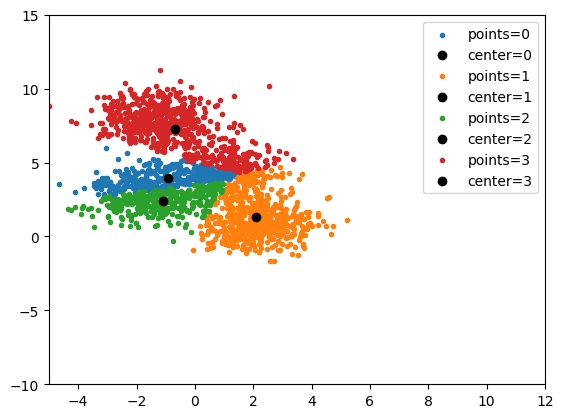

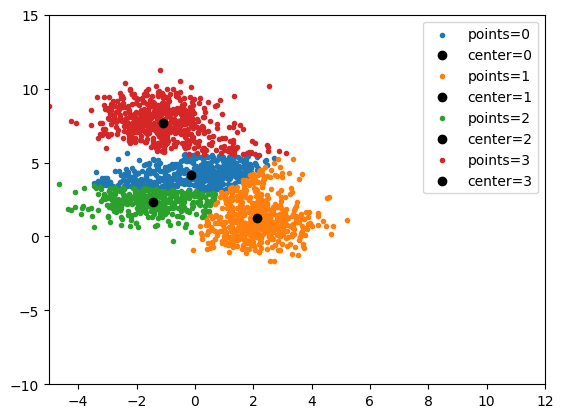

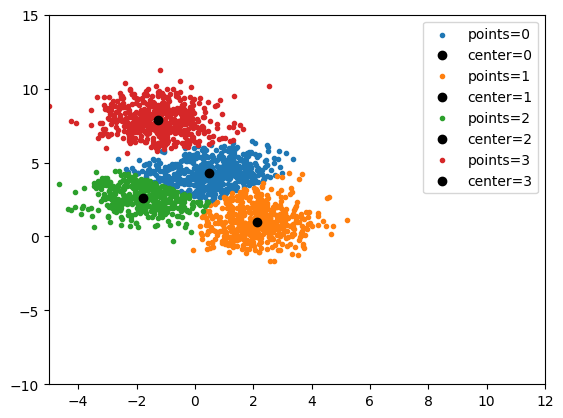

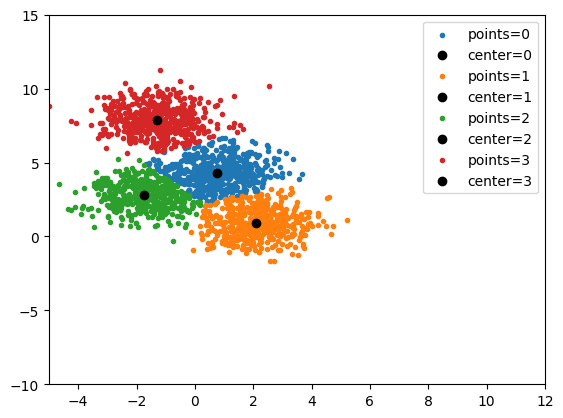

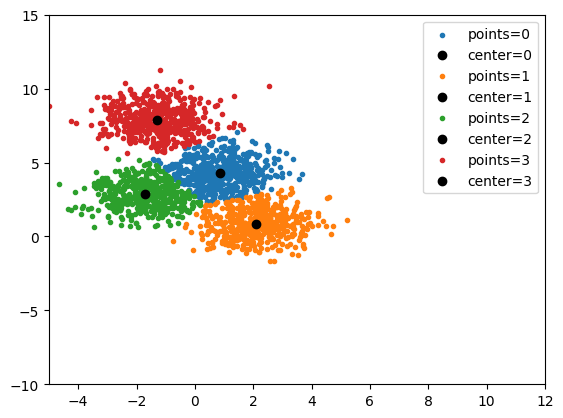

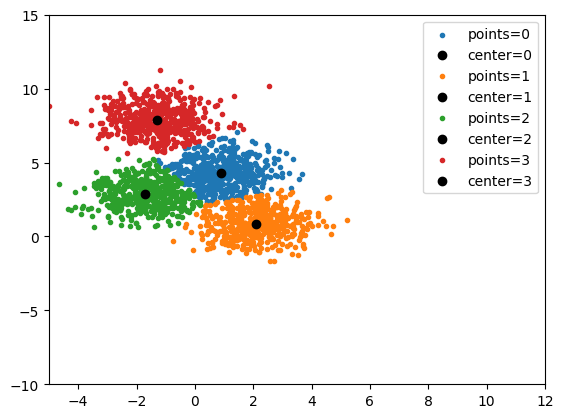

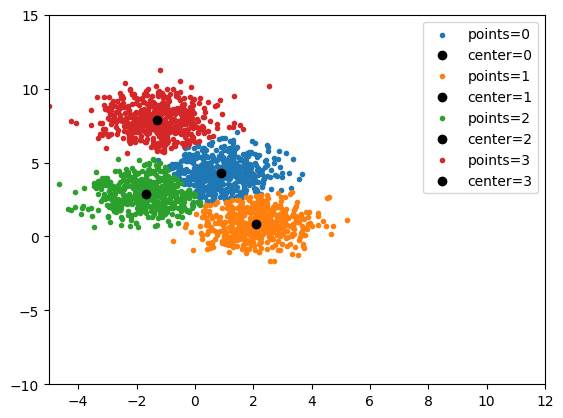

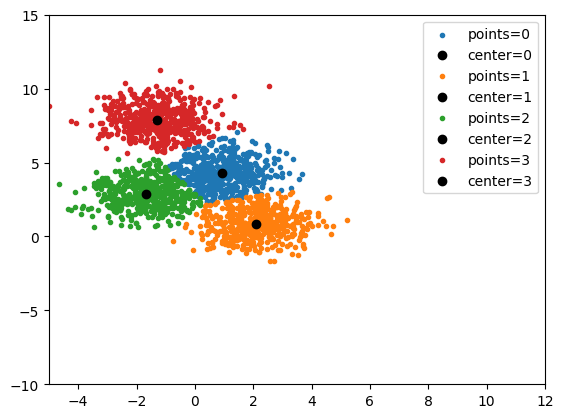

In [31]:
# Loop for num_iters iterations
num_iters = 10
for n in range(num_iters):
    # Get the closest centroid
    closest_centroid = get_closest_centroid(data, centroids)

    # Assign the centroid to the data point.
    assigned_centroids = closest_centroid

    # Loop over centroids and compute the new ones.
    for c in range(len(centroids)):
        # Get all the data points belonging to a particular cluster
        cluster_data = data[assigned_centroids == c]

        # Compute the average of cluster members to compute new centroid
        new_centroid = cluster_data.mean(axis = 0)

        # assign the new centroid
        centroids[c] = new_centroid

    `   # plot(data, centroids)
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker = '.', label = f'points={c}')
        plt.scatter(centroids[c][0], centroids[c][1], color = 'black', label = f'center={c}')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()


### HW: modify the above code to Plot 3 Clusters

SKLearn Implementation:

In [32]:
from sklearn.cluster import KMeans

k = 4 ## arbitrary value
kmeans = KMeans(n_clusters=k,random_state = 42)
y_pred = kmeans.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
y_pred

array([1, 3, 2, ..., 3, 1, 3], dtype=int32)

In [33]:
set(y_pred)

{0, 1, 2, 3}

In [ ]:
kmeans.inertia_ # WHAT IS INERTIA

3489.5482248084563

In [ ]:
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

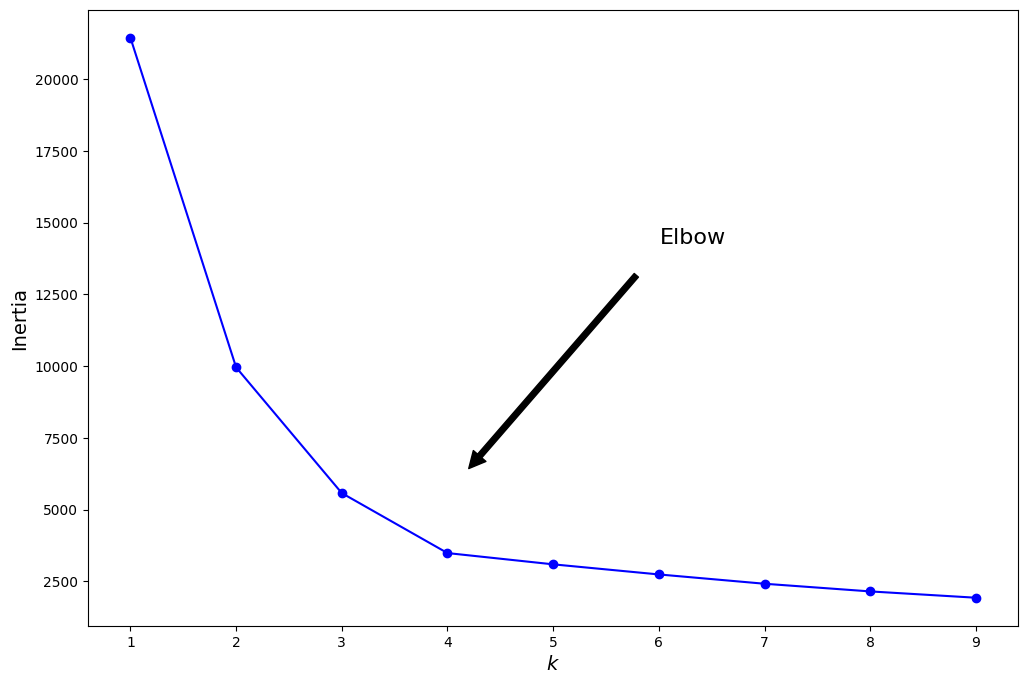

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()